In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import seaborn as sns

In [ ]:
df = pd.read_csv('../../data/denver_listing_dates_with_ct.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [ ]:
df.describe()

,property_id,zipcode,latitude,longitude,sale_price,index_right,ct_key
count,4.394270e+05,439427.000000,439427.000000,439427.000000,3.279290e+05,439427.000000,4.394270e+05
mean,3.002459e+08,80220.764630,39.813445,-104.979442,4.681945e+05,10174.359987,8.031449e+09
std,3.720041e+08,181.469689,0.284188,0.160879,3.193087e+05,359.401731,2.573723e+07
min,1.009100e+04,80002.000000,38.996920,-105.946410,1.000000e+01,9604.000000,8.001008e+09
25%,1.383219e+08,80104.000000,39.636260,-105.082030,3.120000e+05,9849.000000,8.005084e+09
50%,1.402957e+08,80209.000000,39.744420,-104.986732,4.010000e+05,10150.000000,8.031004e+09
75%,4.363049e+08,80260.000000,39.918841,-104.875490,5.333000e+05,10476.000000,8.059010e+09
max,2.146980e+09,80643.000000,40.998080,-103.890703,2.357500e+07,10810.000000,8.123003e+09


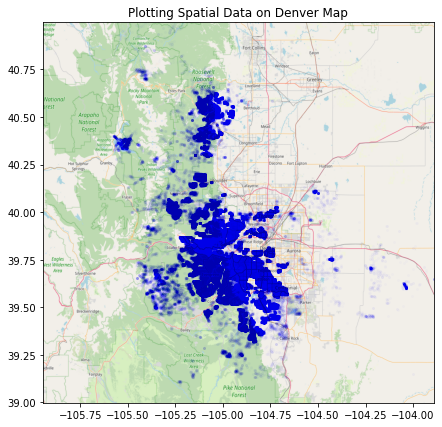

In [ ]:
denver = plt.imread('../denver_map.png')
BBox = (df.longitude.min(), df.longitude.max(),      
         df.latitude.min(), df.latitude.max())
        
fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.01, c='b', s=4)
ax.set_title('Plotting Spatial Data on Denver Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(denver, zorder=0, extent = BBox, aspect= 'equal')

plt.show()

In [ ]:
denver_df = df[(df['longitude'] >= -105.25) & 
               (df['longitude'] <= -104.55) & 
               (df['latitude'] >= 39.5) & 
               (df['latitude'] <= 40)]

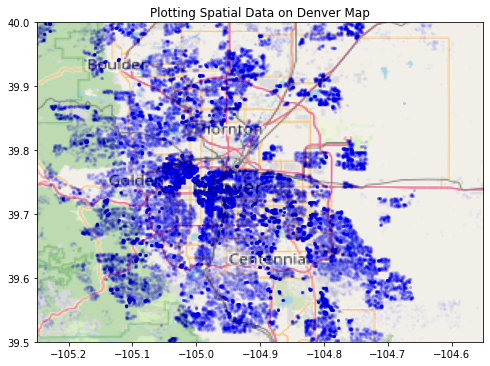

In [ ]:
denver_small = plt.imread('../denver_small.png')
BBox = (denver_df.longitude.min(), denver_df.longitude.max(),      
         denver_df.latitude.min(), denver_df.latitude.max())
        
fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(denver_df.longitude, denver_df.latitude, zorder=1, alpha= 0.01, c='b', s=4)
ax.set_title('Plotting Spatial Data on Denver Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(denver_small, zorder=0, extent = BBox, aspect= 'equal')

plt.show()

In [ ]:
prop = pd.read_csv('../../data/denver_property_info.csv')
prop = prop.rename(columns={'cc_property_id': 'property_id'})

/Users/namluu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
prop.head()

,property_id,data_source,address,city,zipcode,cc_property_address_county,fips,apn,property_guid,latitude,...,below_grade_bed_count,below_grade_sqft,current_use,fencing_description,frontage_length,property_condition,property_quality,senior_community_indicator,zoning_code,zoning_description
0,138572150,dataharmony,4950 Dover St,Arvada,80002,JEFFERSON,8059.0,004274,NaN,39.78644,...,NaN,NaN,Multi-Family,Partial,NaN,New Construction,Stucco,NaN,R-2,NaN
1,322446242,dataharmony,5260 Estes Cir,Arvada,80002,NaN,8059.0,NaN,NaN,39.79225,...,NaN,NaN,NaN,NaN,NaN,NaN,"Frame,Vinyl Siding",NaN,R,NaN
2,138560546,dataharmony,5622 Ammons St,Arvada,80002,NaN,8059.0,NaN,NaN,39.79995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,138555680,dataharmony,5615 Jellison St,Arvada,80002,NaN,8059.0,NaN,NaN,39.79878,...,3.0,1120.0,NaN,Full,NaN,Updated/Remodeled,Brick,NaN,RES,NaN
4,138576011,dataharmony,5303 Arbutus St,Arvada,80002,NaN,8059.0,NaN,NaN,39.79271,...,NaN,1040.0,NaN,NaN,NaN,NaN,Brick,NaN,RES,R-1A


In [ ]:
df.head()

,property_id,zipcode,latitude,longitude,list_date,sale_date,withdrawn_date,expired_date,cancelled_date,current_status,sale_price,geometry,index_right,ct_key
0,666680976,80113,39.65232,-104.97613,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-104.97613 39.65232),10693.0,8.005006e+09
1,138826052,80123,39.62523,-105.08648,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.08648 39.62523),9869.0,8.059012e+09
2,666683709,80204,39.74122,-105.05241,2016-03-01,NaT,NaN,2016-03-01,NaN,Expired,NaN,POINT (-105.05241 39.74122),10476.0,8.031001e+09
3,137981678,80241,39.91465,-104.93076,2016-03-01,2016-04-21,NaN,NaN,NaN,Sale,320000.0,POINT (-104.93076 39.91465),9719.0,8.001009e+09
4,410875086,80202,39.74783,-104.98640,2016-03-01,2016-05-02,NaN,NaN,NaN,Sale,475000.0,POINT (-104.9864 39.74783),10465.0,8.031002e+09


In [ ]:
houses = pd.merge(prop, df, on='property_id')

In [ ]:
ctdf = pd.read_csv('../../data/denver_census_tract_data.csv')

In [ ]:
ctdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Columns: 112 entries, ct_key to built 2000-2009
dtypes: float64(103), int64(9)
memory usage: 660.8 KB


In [ ]:
ctdf.head()

,ct_key,median_rental_price,average_annual_rent_as_percentage_of_property_value,farm_score,pop_density,densely_urban_score,urban_score,suburban_score,rural_score,remote_score,...,>1M,married,divorced/separated/widowed,never_married,percent_mortgage,median_mortgage_value,vacancy_rate,built 2014 or later,built 2010-2013,built 2000-2009
0,8001007801,1316.0,6.024884,100.0,15066.473217,7.0,10.0,33.0,83.0,93.0,...,0.056075,33.7,22.8,43.5,0.803738,173000.0,0.057437,0.000000,0.000000,0.130339
1,8001007802,1239.0,9.187587,100.0,15270.696288,7.0,10.0,33.0,83.0,93.0,...,0.000000,34.1,16.1,49.8,0.724409,256600.0,0.063513,0.000000,0.000000,0.015554
2,8001007900,1482.0,10.041348,100.0,8644.378631,14.0,6.0,26.0,76.0,86.0,...,0.015576,38.7,14.9,46.5,0.860395,174000.0,0.058824,0.002966,0.014829,0.007909
3,8001008000,1499.0,7.532211,100.0,7448.779496,17.0,3.0,23.0,73.0,83.0,...,0.000000,43.6,18.4,37.9,0.757377,223400.0,0.027945,0.003836,0.000000,0.003836
4,8001008100,2203.0,10.072085,100.0,820.952275,71.0,51.0,1.0,19.0,29.0,...,0.000000,30.8,17.1,52.1,0.269231,34400.0,0.136087,0.063183,0.290401,0.507898


In [ ]:
ctdf_sm = ctdf[['ct_key', 
                'farm_score', 'densely_urban_score', 'suburban_score', 'rural_score', 'remote_score', 
                'median_rental_price', 'pop_density', 'first_time_homebuyer_score', 'luxury_communities_score', 
                'retirement_friendly_score', 'young_single_professional_score', 
                'college_student_friendly_score', 'violent_crime_rate', 
                'property_crime_rate', 'walk', 'public_transportation', 'car', 'carpool']]

ctdf_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ct_key                           755 non-null    int64  
 1   farm_score                       755 non-null    float64
 2   densely_urban_score              755 non-null    float64
 3   suburban_score                   755 non-null    float64
 4   rural_score                      755 non-null    float64
 5   remote_score                     755 non-null    float64
 6   median_rental_price              755 non-null    float64
 7   pop_density                      755 non-null    float64
 8   first_time_homebuyer_score       755 non-null    float64
 9   luxury_communities_score         755 non-null    float64
 10  retirement_friendly_score        755 non-null    float64
 11  young_single_professional_score  755 non-null    float64
 12  college_student_friend

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439427 entries, 0 to 439426
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   property_id     439427 non-null  int64         
 1   zipcode         439427 non-null  int64         
 2   latitude        439427 non-null  float64       
 3   longitude       439427 non-null  float64       
 4   list_date       439427 non-null  datetime64[ns]
 5   sale_date       328118 non-null  datetime64[ns]
 6   withdrawn_date  38244 non-null   object        
 7   expired_date    21638 non-null   object        
 8   cancelled_date  79 non-null      object        
 9   current_status  439427 non-null  object        
 10  sale_price      327929 non-null  float64       
 11  geometry        439427 non-null  object        
 12  index_right     439427 non-null  float64       
 13  ct_key          439427 non-null  float64       
dtypes: datetime64[ns](2), float64(5), in

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426847 entries, 0 to 426846
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   property_id                    426847 non-null  int64         
 1   data_source                    426847 non-null  object        
 2   address                        426846 non-null  object        
 3   city                           426840 non-null  object        
 4   zipcode_x                      426847 non-null  int64         
 5   cc_property_address_county     163035 non-null  object        
 6   fips                           423280 non-null  float64       
 7   apn                            89970 non-null   object        
 8   property_guid                  332 non-null     object        
 9   latitude_x                     426564 non-null  float64       
 10  longitude_x                    426564 non-null  float64       
 11  

In [ ]:
percent_notnull = houses.notnull().sum() * 100 / len(df)
notnull_df = pd.DataFrame({'column_name': houses.columns, 'percent_notnull': percent_notnull})

In [ ]:
notnull_df[notnull_df['percent_notnull'] >= 50]

,column_name,percent_notnull
property_id,property_id,97.137181
data_source,data_source,97.137181
address,address,97.136953
city,city,97.135588
zipcode_x,zipcode_x,97.137181
fips,fips,96.325442
latitude_x,latitude_x,97.072779
longitude_x,longitude_x,97.072779
sqft,sqft,91.628189
state,state,97.081882


In [ ]:
pd.set_option('display.max_rows', notnull_df.shape[0]+1)
print(notnull_df)

                                                 column_name  percent_notnull
property_id                                      property_id        97.137181
data_source                                      data_source        97.137181
address                                              address        97.136953
city                                                    city        97.135588
zipcode_x                                          zipcode_x        97.137181
cc_property_address_county        cc_property_address_county        37.101726
fips                                                    fips        96.325442
apn                                                      apn        20.474391
property_guid                                  property_guid         0.075553
latitude_x                                        latitude_x        97.072779
longitude_x                                      longitude_x        97.072779
sqft                                                    sqft    

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426847 entries, 0 to 426846
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   property_id                    426847 non-null  int64         
 1   data_source                    426847 non-null  object        
 2   address                        426846 non-null  object        
 3   city                           426840 non-null  object        
 4   zipcode_x                      426847 non-null  int64         
 5   cc_property_address_county     163035 non-null  object        
 6   fips                           423280 non-null  float64       
 7   apn                            89970 non-null   object        
 8   property_guid                  332 non-null     object        
 9   latitude_x                     426564 non-null  float64       
 10  longitude_x                    426564 non-null  float64       
 11  

In [ ]:
truncated_df = houses[['property_id', 'zipcode_x', 'fips', 'latitude_x', 'longitude_x', 'sqft', 'property_type', 'has_central_air', 'has_jacuzzi', 'has_pool', 'has_solar', 'has_garage', 'list_date', 'sale_date', 'sale_price','ct_key']]

# truncated_df = houses[['property_id','list_date', 'sale_date', 'sale_price', 'bedrooms']]


In [ ]:
truncated_df

,property_id,zipcode_x,fips,latitude_x,longitude_x,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,list_date,sale_date,sale_price,ct_key
0,138572150,80002,8059.0,39.78644,-105.09357,NaN,OTHER,False,False,False,False,False,2017-09-01,NaT,NaN,8.059010e+09
1,138572150,80002,8059.0,39.78644,-105.09357,NaN,OTHER,False,False,False,False,False,2020-09-28,NaT,NaN,8.059010e+09
2,322446242,80002,8059.0,39.79225,-105.09622,NaN,CONDO,False,False,False,False,False,2017-01-15,2017-02-16,282000.0,8.059010e+09
3,322446242,80002,8059.0,39.79225,-105.09622,NaN,CONDO,False,False,False,False,False,2019-07-31,2019-09-24,330000.0,8.059010e+09
4,138560546,80002,8059.0,39.79995,-105.08691,1687.0,SINGLE,False,False,False,False,False,2018-05-17,2018-07-09,350000.0,8.059010e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426842,503644833,80643,8123.0,40.10629,-104.52506,1288.0,SINGLE,False,False,False,False,False,2018-07-31,2018-09-14,294000.0,8.123003e+09
426843,551276799,80643,8123.0,40.03606,-104.47066,1810.0,SINGLE,False,False,False,False,False,2017-08-17,2017-10-11,478000.0,8.123003e+09
426844,139419740,80643,8123.0,40.10923,-104.51945,1000.0,SINGLE,False,False,False,False,False,2018-05-11,2018-07-30,140000.0,8.123003e+09
426845,480458508,80643,8123.0,40.10286,-104.52007,1620.0,SINGLE,False,False,False,False,False,2017-02-18,2017-03-24,289000.0,8.123003e+09


In [ ]:
truncated_df = truncated_df.rename(columns={"latitude_x": "latitude", 'longitude_x': 'longitude', 'zipcode_x': 'zipcode'})

In [ ]:
clean_df = truncated_df.dropna().copy()

In [ ]:
clean_df['sale_price_per_sqft'] = clean_df['sale_price'] / clean_df['sqft']

In [ ]:
clean_df

,property_id,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,list_date,sale_date,sale_price,ct_key,sale_price_per_sqft
4,138560546,80002,8059.0,39.79995,-105.08691,1687.0,SINGLE,False,False,False,False,False,2018-05-17,2018-07-09,350000.0,8.059010e+09,207.468880
6,138555680,80002,8059.0,39.79878,-105.10757,2220.0,SINGLE,False,False,False,False,False,2019-12-27,2020-01-31,425000.0,8.059010e+09,191.441441
7,138576011,80002,8059.0,39.79271,-105.14868,1200.0,SINGLE,False,False,False,False,False,2019-03-30,2019-05-17,439900.0,8.059010e+09,366.583333
8,138574571,80002,8059.0,39.79170,-105.13083,2127.0,SINGLE,False,False,False,False,False,2017-09-28,2017-10-31,462000.0,8.059010e+09,217.207334
9,138574571,80002,8059.0,39.79170,-105.13083,2127.0,SINGLE,False,False,False,False,False,2019-09-11,2019-10-23,549000.0,8.059010e+09,258.110014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426840,577709232,80643,8001.0,39.95822,-104.54549,1996.0,SINGLE,False,False,False,False,False,2018-05-07,2018-07-20,491302.0,8.001008e+09,246.143287
426842,503644833,80643,8123.0,40.10629,-104.52506,1288.0,SINGLE,False,False,False,False,False,2018-07-31,2018-09-14,294000.0,8.123003e+09,228.260870
426843,551276799,80643,8123.0,40.03606,-104.47066,1810.0,SINGLE,False,False,False,False,False,2017-08-17,2017-10-11,478000.0,8.123003e+09,264.088398
426844,139419740,80643,8123.0,40.10923,-104.51945,1000.0,SINGLE,False,False,False,False,False,2018-05-11,2018-07-30,140000.0,8.123003e+09,140.000000


In [ ]:
augmented = pd.merge(clean_df, ctdf_sm, on='ct_key')

In [ ]:
augmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308698 entries, 0 to 308697
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   property_id                      308698 non-null  int64         
 1   zipcode                          308698 non-null  int64         
 2   fips                             308698 non-null  float64       
 3   latitude                         308698 non-null  float64       
 4   longitude                        308698 non-null  float64       
 5   sqft                             308698 non-null  float64       
 6   property_type                    308698 non-null  object        
 7   has_central_air                  308698 non-null  bool          
 8   has_jacuzzi                      308698 non-null  bool          
 9   has_pool                         308698 non-null  bool          
 10  has_solar                        308698 non-

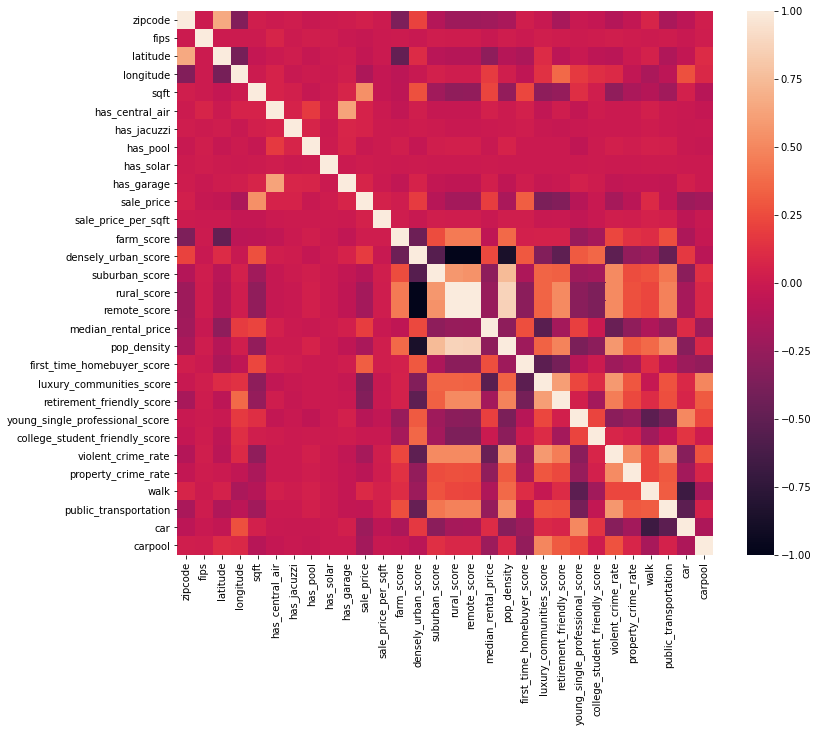

In [ ]:
augmented_features = augmented.drop(columns=['property_id', 'ct_key'])
corr = augmented_features.corr()
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

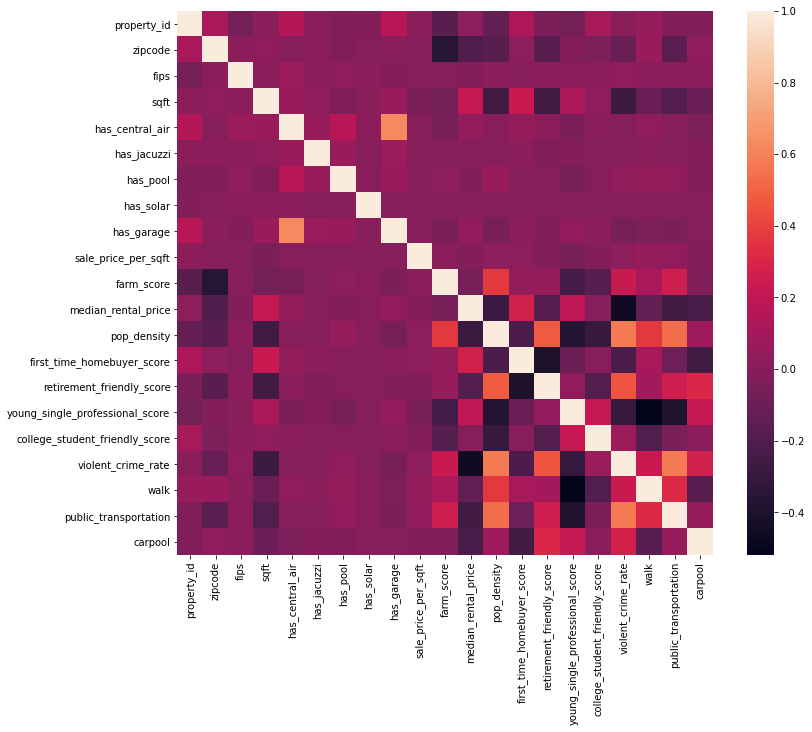

In [ ]:
to_drop = ['latitude', 'longitude', 
           'ct_key', 'suburban_score', 'rural_score', 
           'remote_score', 'sale_price', 'car', 
           'property_crime_rate', 'densely_urban_score', 
           'luxury_communities_score']
augmented_features = augmented.drop(columns=to_drop)
corr = augmented_features.corr()
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# augmented_features.to_csv('../data/denver_augmented_clean.csv', index=False)
# clean_df.to_csv('../data/denver_prop_listing_clean.csv', index=False)

In [ ]:
augmented_features

,property_id,zipcode,fips,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,...,median_rental_price,pop_density,first_time_homebuyer_score,retirement_friendly_score,young_single_professional_score,college_student_friendly_score,violent_crime_rate,walk,public_transportation,carpool
0,138560546,80002,8059.0,1687.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
1,138555680,80002,8059.0,2220.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
2,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
3,138574571,80002,8059.0,2127.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
4,138567704,80002,8059.0,1549.0,SINGLE,False,False,False,False,False,...,2385.0,3317.321845,100.000000,66.918255,43.566921,67.421430,2.764467,0.015244,0.016463,0.080793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308693,517468281,80602,8001.0,1472.0,CONDO,False,False,False,False,False,...,1923.0,3147.582231,7.676923,83.744398,44.831191,30.092936,2.001334,0.007018,0.010526,0.066667
308694,661797786,80602,8001.0,1440.0,SINGLE,False,False,False,False,True,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308695,551997597,80603,8123.0,3051.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147
308696,550970025,80603,8123.0,2900.0,SINGLE,False,False,False,False,False,...,1220.0,1307.892557,57.323550,69.171547,56.438041,12.436416,1.000000,0.055944,0.016084,0.053147


In [ ]:
def calculate_mean_dom(x):
  print('current: {}'.format(x['list_date']))
  before = x['list_date'] - pd.Timedelta(days=30)
  print('before: {}'.format(before))

In [ ]:
# augmented_features.apply(calculate_mean_dom, axis=1)

In [ ]:
# augmented_features.to_csv('../data/denver_augmented_clean.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c850c61-d934-4c85-b16d-3cb283df0c84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>